## import modules

In [197]:
import pandas as pd
import bqplot
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
%matplotlib inline

## import data

In [198]:
buildings = pd.read_csv("building_inventory.csv")

In [199]:
# Take a look at the buildings data:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided


## The process of data cleaning:

In [200]:
# First I try to exclude the values with Year Acquired = 0, Year Constructed  = 0 and Square Footage = 0.
new_buildings = buildings[(buildings['Year Acquired']!=0)&(buildings['Year Constructed']!=0)&(buildings['Square Footage']!=0)]

In [201]:
# Then I use group by to get a table of Year Acquired and Total Square Footage
total = new_buildings.groupby("Year Acquired")["Square Footage"].sum().reset_index(name="Total Square Footage")
total

,Year Acquired,Total Square Footage
0,1753,1200
1,1802,4440
2,1810,4033
3,1832,120000
4,1837,10302
5,1838,2010
6,1839,11752
7,1840,36918
8,1841,3256
9,1843,900


In [202]:
# Then I start to make line plot using bqplot which shows the relationship between Year and Total Square Footage.
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# set up axis
x_ax = bqplot.Axis(scale=x_sc, label='Year')
y_ax = bqplot.Axis(scale=y_sc, label='Total Square Footage', 
                  orientation='vertical')

# marks
Lines = bqplot.marks.Lines(x = total['Year Acquired'], y = total['Total Square Footage'],
                         scales={'x':x_sc, 'y':y_sc})

# put all together in a figure
fig = bqplot.Figure(marks=[Lines], axes=[x_ax, y_ax])
fig

Figure(axes=[Axis(label='Year', scale=LinearScale()), Axis(label='Total Square Footage', orientation='vertical…

In [203]:
# In order to get the Total Square Footage of each Congressional District and Agency Name,
# I use group by to make a new table containing these values named agency.
agency = new_buildings['Square Footage'].groupby([new_buildings['Congress Dist'], new_buildings['Agency Name'], new_buildings['Year Acquired']]).sum().reset_index(name="Total Square Footage")
agency

,Congress Dist,Agency Name,Year Acquired,Total Square Footage
0,0,Department of Central Management Services,1855,3848
1,0,Department of Central Management Services,1968,18000
2,0,Department of Central Management Services,1974,208030
3,0,Department of Central Management Services,1977,1400
4,0,Department of Human Services,1952,900
5,0,Department of Human Services,1953,1689
6,0,Department of Human Services,1955,9426
7,0,Department of Human Services,1957,47209
8,0,Department of Human Services,1958,61376
9,0,Department of Human Services,1965,59096


In [204]:
# Then I try to re-index the agency name because they are not numerical.
# First, I use unique function to find all unique values of Agency Name and make it a list.
agency_index = agency["Agency Name"].unique()
ag_index = agency_index.tolist()
ag_index

['Department of Central Management Services',
 'Department of Human Services',
 'Department of Natural Resources',
 'Department of State Police',
 'Department of Transportation',
 "Department of Veterans' Affairs",
 'Historic Preservation Agency',
 'Illinois Emergency Management Agency',
 'Illinois Medical District Commission',
 'Northern Illinois University',
 'Chicago State University',
 'Department of Military Affairs',
 'Department of Corrections',
 'University of Illinois',
 'Governors State University',
 'Illinois Community College Board',
 'Northeastern Illinois University',
 'Office of the Secretary of State',
 'Department of Juvenile Justice',
 'IL State Board of Education',
 'Appellate Court / Second District',
 'Illinois Board of Higher Education',
 'Appellate Court / Fifth District',
 'Department of Agriculture',
 'Department of Public Health',
 'Southern Illinois University',
 'Appellate Court / Fourth District',
 'Department of Revenue',
 "Governor's Office",
 'Illinois C

In [205]:
# Then I use a function to get create a new column storing each agency name's index.
def get_index(x):
    if x in ag_index:
        return ag_index.index(x)

agency.loc[:,"agency_index"] = agency["Agency Name"].apply(get_index)
agency

,Congress Dist,Agency Name,Year Acquired,Total Square Footage,agency_index
0,0,Department of Central Management Services,1855,3848,0
1,0,Department of Central Management Services,1968,18000,0
2,0,Department of Central Management Services,1974,208030,0
3,0,Department of Central Management Services,1977,1400,0
4,0,Department of Human Services,1952,900,1
5,0,Department of Human Services,1953,1689,1
6,0,Department of Human Services,1955,9426,1
7,0,Department of Human Services,1957,47209,1
8,0,Department of Human Services,1958,61376,1
9,0,Department of Human Services,1965,59096,1


## Make histgram2d

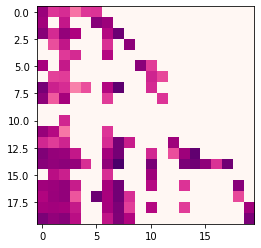

In [206]:
# Then I start to make the heatmap using histogram2d
nlong = 20
nlat = 20
hist2d, x_edges, y_edges = np.histogram2d(agency['agency_index'], 
                                              agency['Congress Dist'], 
                                              weights = agency['Total Square Footage'], 
                                              bins=[nlong, nlat])
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

In [207]:
x_edges.shape

(21,)

In [208]:
x_centers = (x_edges[:-1] + x_edges[1:])/2
y_centers = (y_edges[:-1] + y_edges[1:])/2
y_centers

array([ 0.45,  1.35,  2.25,  3.15,  4.05,  4.95,  5.85,  6.75,  7.65,
        8.55,  9.45, 10.35, 11.25, 12.15, 13.05, 13.95, 14.85, 15.75,
       16.65, 17.55])

In [209]:
x_centers

array([ 0.85,  2.55,  4.25,  5.95,  7.65,  9.35, 11.05, 12.75, 14.45,
       16.15, 17.85, 19.55, 21.25, 22.95, 24.65, 26.35, 28.05, 29.75,
       31.45, 33.15])

In [210]:
x_bins = np.linspace(0, 34, nlong+1)
y_bins = np.linspace(0, 18, nlat+1)

hist2d, x_edges, y_edges = np.histogram2d(agency['agency_index'], 
                                              agency['Congress Dist'], 
                                              weights = agency['Total Square Footage'], 
                                               bins=[x_bins, y_bins])

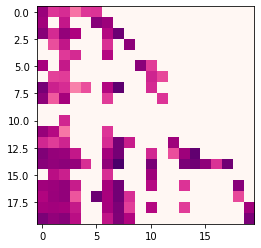

In [211]:
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

In [212]:
#hist2d = hist2d.T
#plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

In [213]:
np.log10(hist2d).min()
np.log10(hist2d).max()

D:\Gin356A\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
D:\Gin356A\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


7.193820164990325

In [214]:
hist2d[hist2d<= 0] = np.nan

hist2d = np.log10(hist2d)

In [215]:
np.nanmin(hist2d)

3.3736474722092176

## Make heatmap

In [216]:
# Creating the heat map dash board with interactivity.
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='RdPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))

x_centers = (x_edges[:-1] + x_edges[1:])/2
y_centers = (y_edges[:-1] + y_edges[1:])/2

# axis
x_ax = bqplot.Axis(scale=x_sc, label='Agency Name')
y_ax = bqplot.Axis(scale=y_sc, label='Congressional District', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=x_centers, 
                             column=y_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

# interactivty
mySelectedLabel = ipywidgets.Label() # print out info about our selection
def get_data_value(change):
    # to make sure we only support single selections
    if len(change['owner'].selected) == 1: # *only* 1 selection
        #print(change['owner'].selected)
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        mySelectedLabel.value = 'Total Square Footage = ' + str(v)
    
# make sure we "observe" for a change in our heatmap (traitlets)
heat_map.observe(get_data_value, 'selected')

# put all together
fig = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
fig

myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

In [217]:
# create line plot
# scales
import datetime as dt   # for formatting min/max in bqplot.DateScale
x_scl = bqplot.LinearScale(min=1850, max=2020)
y_scl = bqplot.LinearScale() 

# axis
ax_xcl = bqplot.Axis(label='Year Acquired', scale=x_scl) # dates
ax_ycl = bqplot.Axis(label='Total Square Footage', scale=y_scl, 
                    orientation='vertical', side='left')

# marks
i, j = 19, 0 
xs = [x_edges[i], x_edges[i+1]]
ys = [y_edges[j], y_edges[j+1]]

region_mask = ( (agency['Congress Dist'] >= xs[0]) & (agency['Congress Dist'] <= xs[1]) &\
               (agency['agency_index'] >= ys[0]) & (agency['agency_index']<= ys[1]))


footage_year = bqplot.Lines(x=agency['Year Acquired'], 
                               y=agency['Total Square Footage'],
                               scales={'x':x_scl, 'y':y_scl})

bqplot.Figure(marks=[footage_year], axes=[ax_xcl, ax_ycl])

Figure(axes=[Axis(label='Year Acquired', scale=LinearScale(max=2020.0, min=1850.0)), Axis(label='Total Square …

In [218]:
# link heatmap with line plot
def get_data_value(change):
    # to make sure we only support single selections
    if len(change['owner'].selected) == 1: # *only* 1 selection
        j,i = change['owner'].selected[0]
        v = hist2d[j,i]
        mySelectedLabel.value = 'Total Square Footage = ' + str(v)
        
        # upadate line plot
        xs = [x_edges[i], x_edges[i+1]]
        ys = [y_edges[j], y_edges[j+1]]
        
        region_mask = ( (agency['Congress Dist'] >= xs[0]) & (agency['Congress Dist'] <= xs[1]) &\
                       (agency['agency_index'] >= ys[0]) & (agency['agency_index']<= ys[1]) )
        
        footage_year.x = agency['Year Acquired'][region_mask]
        footage_year.y = agency['Total Square Footage'][region_mask]
          
# make sure we "observe" for a change in our heatmap (traitlets)
heat_map.observe(get_data_value, 'selected')

In [219]:
# create figure
fig_heatmap = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
fig_line = bqplot.Figure(marks=[footage_year], axes=[ax_xcl, ax_ycl])

In [220]:
# put it all together 
fig_heatmap.layout.min_width='400px'
fig_line.layout.min_width = '400px'

plots = ipywidgets.HBox([fig_heatmap, fig_line])
myDashboard = ipywidgets.VBox([mySelectedLabel, plots])
myDashboard

## 2 Questions to think about:
1. Can you keep the x and y ranges static on the line plot?

Yes, we can use bqplot.LinearScale to set the x and y ranges.

2. Can you change the style?

Yes, by change the scheme in bqplot.ColorScale, we can change the style of the heatmap.